<a href="https://colab.research.google.com/github/van-dang/FEniCS-Colab/blob/master/interpolation_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Original source:
# Introduction to finite element methods
# Hans Petter Langtangen
# Link: http://hplgit.github.io/INF5620/doc/pub/main_fem.pdf

import sympy as sp

def least_squares(f, psi, Omega):
    N = len(psi) - 1
    A = sp.zeros(N+1, N+1)
    b = sp.zeros(N+1, 1)
    x = sp.Symbol('x')
    for i in range(N+1):
        for j in range(i, N+1):
            A[i,j] = sp.integrate(psi[i]*psi[j],
                                  (x, Omega[0], Omega[1]))
            A[j,i] = A[i,j]
        b[i,0] = sp.integrate(psi[i]*f, (x, Omega[0], Omega[1]))
        c = A.LUsolve(b)
        u=0
    for i in range(len(psi)):
        u += c[i,0]*psi[i]
    return u
  
def interpolation(f, psi, points):
    N = len(psi) - 1
    A = sp.zeros(N+1, N+1)
    b = sp.zeros(N+1, 1)
    x = sp.Symbol('x')
    # Turn psi and f into Python functions
    psi_vals = [sp.lambdify([x], psi[i]) for i in range(N+1)]
    f = sp.lambdify([x], f)
    for i in range(N+1):
        for j in range(N+1):
            A[i,j] = psi_vals[j](points[i])
        b[i,0] = f(points[i])
    c = A.LUsolve(b)
    u=0
    for i in range(len(psi)):
        u += c[i,0]*psi_vals[i](x)
    return u

[1, 2]


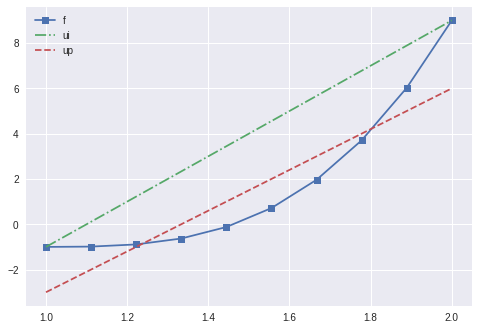

In [125]:
x = sp.Symbol('x')
f = 10*(x-1)**3-1
psi=[1, x]
a, b = 1, 2

up = least_squares(f, psi, Omega=[a, b])

points = [a,b]
ui = interpolation(f, psi, points)

lam_f = lambdify(x, f, modules=['numpy'])
lam_ui = lambdify(x, ui, modules=['numpy'])
lam_up = lambdify(x, up, modules=['numpy'])


x_vals = linspace(1, 2, 10)
f_vals = lam_f(x_vals)
ui_vals = lam_ui(x_vals)
up_vals = lam_up(x_vals)

plt.figure(1)
plt.plot(x_vals, f_vals,'-s',x_vals, ui_vals,'-.', x_vals, up_vals,'--')
plt.gca().legend(('f','ui','up'))

print(points)